In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# importing required libraries

In [2]:
df = pd.read_csv("train.csv")

In [7]:
df.shape

(1460, 81)

In [3]:
df.head()
# checking the shape of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

In [5]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df.isna().mean().round(4)*100
# caluclating % of null values and dropping any null values above 50%
# we can see there are few of them that have higher percent of null values they are
# LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature

In [7]:
df.drop(columns=['Id','Alley','LotFrontage','MiscFeature','Fence','PoolQC','FireplaceQu'],axis=1,inplace=True)
#dropping above column as the missing values are higher

In [8]:
df.shape
#there is a change of columns from 81 to 77 as we dropped 4 columns

(1460, 74)

Analyzing missing values

In [9]:
df['GarageFinish'].value_counts()
#here we replace nulls with NA-no garage

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
df['GarageYrBlt'].value_counts()
#here we replace nulls with 0-no year

In [11]:
df['GarageType'].value_counts()
#here we replace nulls with NA-no garage

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [12]:
df['Electrical'].value_counts()
#here we replace nulls with NA

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [13]:
df['MasVnrType'].value_counts()
#here we replace nulls with NA-no type mentioned

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
df['MasVnrArea'].value_counts()
#here we replace nulls with 0-no Area

In [15]:
df['BsmtQual'].value_counts()
#here we replace nulls with NA-nobasement

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [16]:
df['BsmtCond'].value_counts()
#here we replace nulls with NA-nobasement

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [17]:
df['BsmtExposure'].value_counts()
#here we replace nulls with NA-nobasement

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [18]:
df['BsmtFinType1'].value_counts()
#here we replace nulls with NA-nobasement

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [19]:
df['BsmtFinType2'].value_counts()
#here we replace nulls with NA-nobasement

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


IMPUTING ALL MISSING VALUES

In [20]:
rep_list = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
df[rep_list]=df[rep_list].fillna('NA')
#imputing all the values as analyzed before

In [21]:
rep_list1=['GarageYrBlt','MasVnrArea']
df[rep_list1]=df[rep_list1].fillna(0)
# as these both are some what different so imputing them differently and down we will again check the percentage 

In [ ]:
df.isna().mean().round(4)*100

In [ ]:
df.nunique()
#checking all the unique values

UNI-VARIATE ANALYSIS

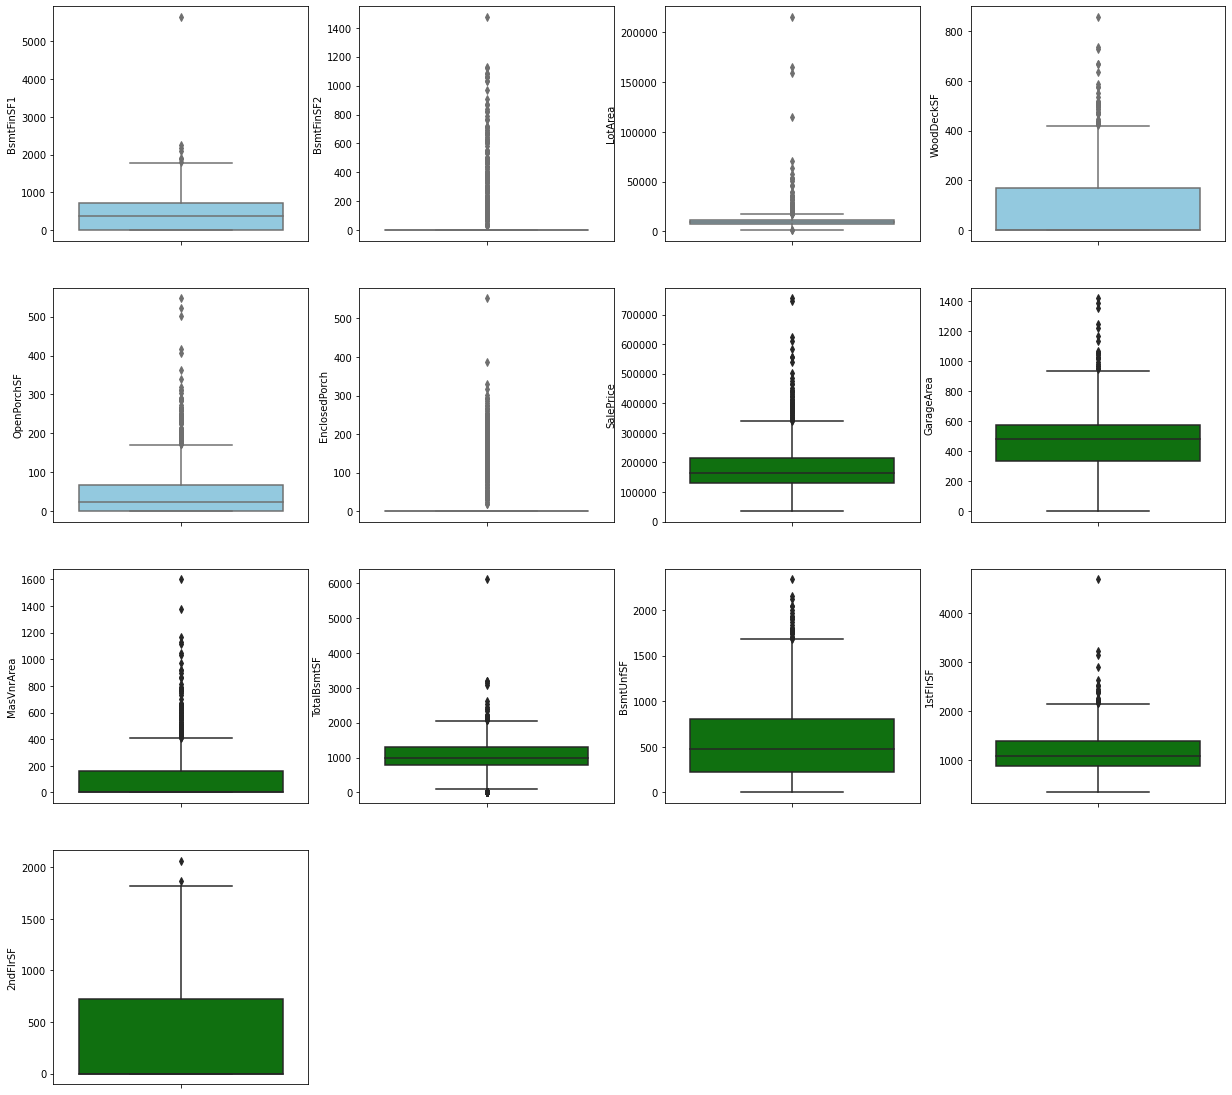

In [24]:
plt.figure(figsize=(21, 25))
plt.subplot(5,4,1)
sns.boxplot(data = df,color='skyblue',y='BsmtFinSF1')
plt.subplot(5,4,2)
sns.boxplot(data = df,color='skyblue',y='BsmtFinSF2')
plt.subplot(5,4,3)
sns.boxplot(data = df,color='skyblue',y='LotArea')
plt.subplot(5,4,4)
sns.boxplot(data = df,color='skyblue',y='WoodDeckSF')
plt.subplot(5,4,5)
sns.boxplot(data = df,color='skyblue',y='OpenPorchSF')
plt.subplot(5,4,6)
sns.boxplot(data = df,color='skyblue',y='EnclosedPorch')
plt.subplot(5,4,7)
sns.boxplot(data = df,color='green',y='SalePrice')
plt.subplot(5,4,8)
sns.boxplot(data = df,color='green',y='GarageArea')
plt.subplot(5,4,9)
sns.boxplot(data = df,color='green',y='MasVnrArea')
plt.subplot(5,4,10)
sns.boxplot(data = df,color='green',y='TotalBsmtSF')
plt.subplot(5,4,11)
sns.boxplot(data = df,color='green',y='BsmtUnfSF')
plt.subplot(5,4,12)
sns.boxplot(data = df,color='green',y='1stFlrSF')
plt.subplot(5,4,13)
sns.boxplot(data = df,color='green',y='2ndFlrSF')
plt.show()
# as we can see that there are outliers in various of them so its better to remove them

REMOVING OUTLIERS

In [25]:
#taking 98% quantile for all of them
quant_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < quant_LotArea]
quant_BsmtFinSF1 = df['BsmtFinSF1'].quantile(0.99)
df = df[df["BsmtFinSF1"] < quant_BsmtFinSF1]
quant_BsmtFinSF2 = df['BsmtFinSF2'].quantile(0.99)
df = df[df["BsmtFinSF2"] < quant_BsmtFinSF2]
quant_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < quant_WoodDeckSF]
quant_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < quant_OpenPorchSF]
quant_EnclosedPorch = df['EnclosedPorch'].quantile(0.99)
df = df[df["EnclosedPorch"] < quant_EnclosedPorch]
quant_SalePrice = df['SalePrice'].quantile(0.99)
df = df[df["SalePrice"] < quant_SalePrice]
quant_GarageArea = df['GarageArea'].quantile(0.99)
df = df[df["GarageArea"] < quant_GarageArea]
quant_MasVnrArea = df['MasVnrArea'].quantile(0.99)
df = df[df["MasVnrArea"] < quant_MasVnrArea]
quant_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < quant_TotalBsmtSF]
quant_BsmtUnfSF = df['BsmtUnfSF'].quantile(0.99)
df = df[df["BsmtUnfSF"] < quant_BsmtUnfSF]
quant_1stFlrSF = df['1stFlrSF'].quantile(0.99)
df = df[df["1stFlrSF"] < quant_1stFlrSF]
quant_2ndFlrSF = df['2ndFlrSF'].quantile(0.99)
df = df[df["2ndFlrSF"] < quant_2ndFlrSF]

In [26]:
df.shape

(1261, 74)

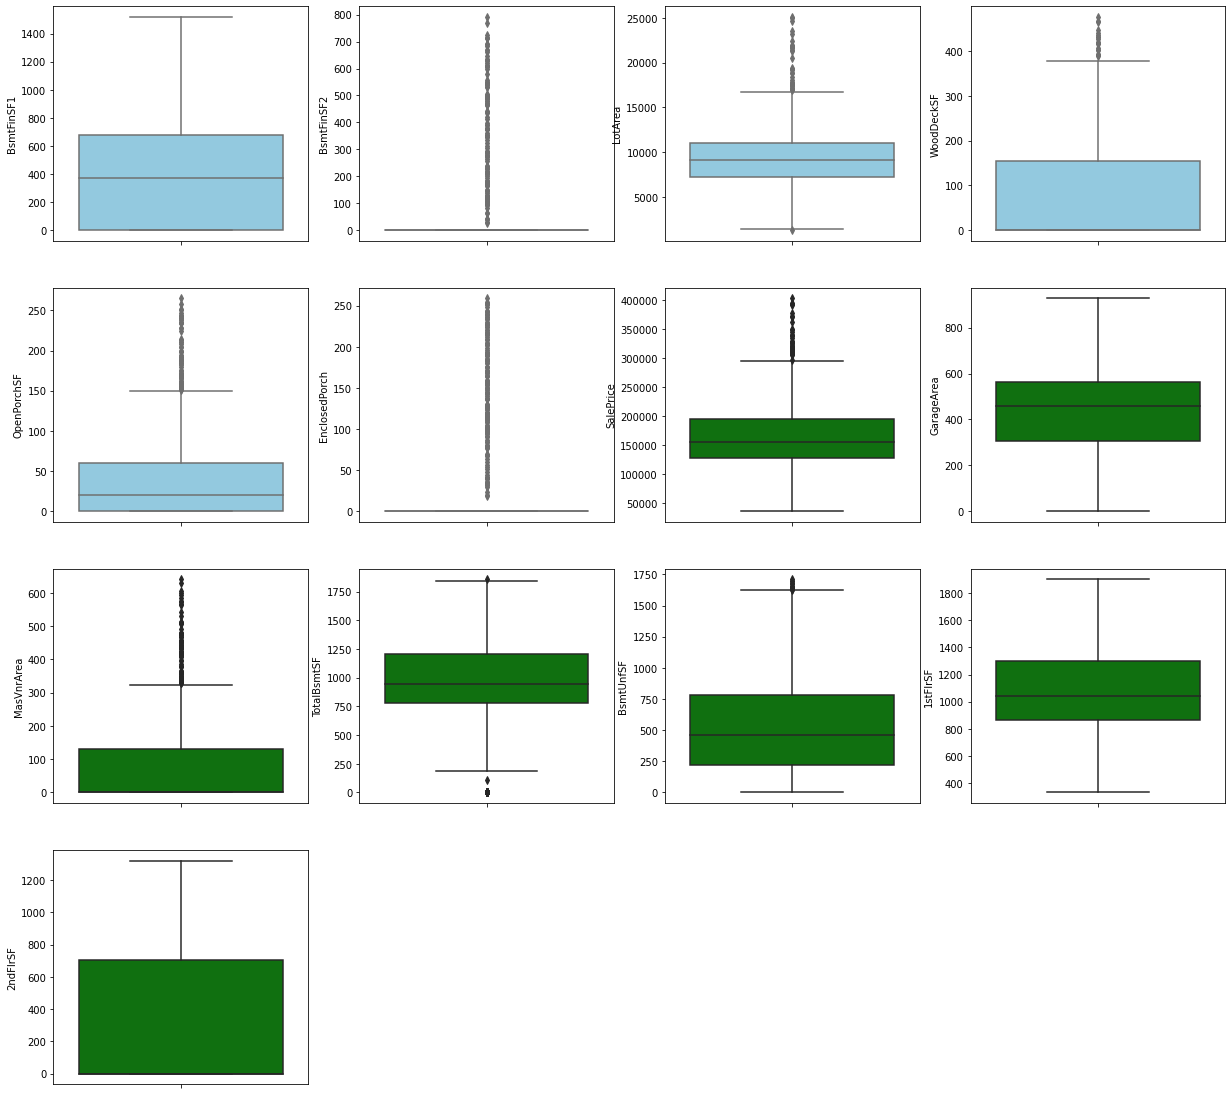

In [27]:
plt.figure(figsize=(21, 25))
plt.subplot(5,4,1)
sns.boxplot(data = df,color='skyblue',y='BsmtFinSF1')
plt.subplot(5,4,2)
sns.boxplot(data = df,color='skyblue',y='BsmtFinSF2')
plt.subplot(5,4,3)
sns.boxplot(data = df,color='skyblue',y='LotArea')
plt.subplot(5,4,4)
sns.boxplot(data = df,color='skyblue',y='WoodDeckSF')
plt.subplot(5,4,5)
sns.boxplot(data = df,color='skyblue',y='OpenPorchSF')
plt.subplot(5,4,6)
sns.boxplot(data = df,color='skyblue',y='EnclosedPorch')
plt.subplot(5,4,7)
sns.boxplot(data = df,color='green',y='SalePrice')
plt.subplot(5,4,8)
sns.boxplot(data = df,color='green',y='GarageArea')
plt.subplot(5,4,9)
sns.boxplot(data = df,color='green',y='MasVnrArea')
plt.subplot(5,4,10)
sns.boxplot(data = df,color='green',y='TotalBsmtSF')
plt.subplot(5,4,11)
sns.boxplot(data = df,color='green',y='BsmtUnfSF')
plt.subplot(5,4,12)
sns.boxplot(data = df,color='green',y='1stFlrSF')
plt.subplot(5,4,13)
sns.boxplot(data = df,color='green',y='2ndFlrSF')
plt.show()
# as we can see that there are outliers in various of them so its better to remove them

SEGMENTED UNIVARIATE ANALYSIS

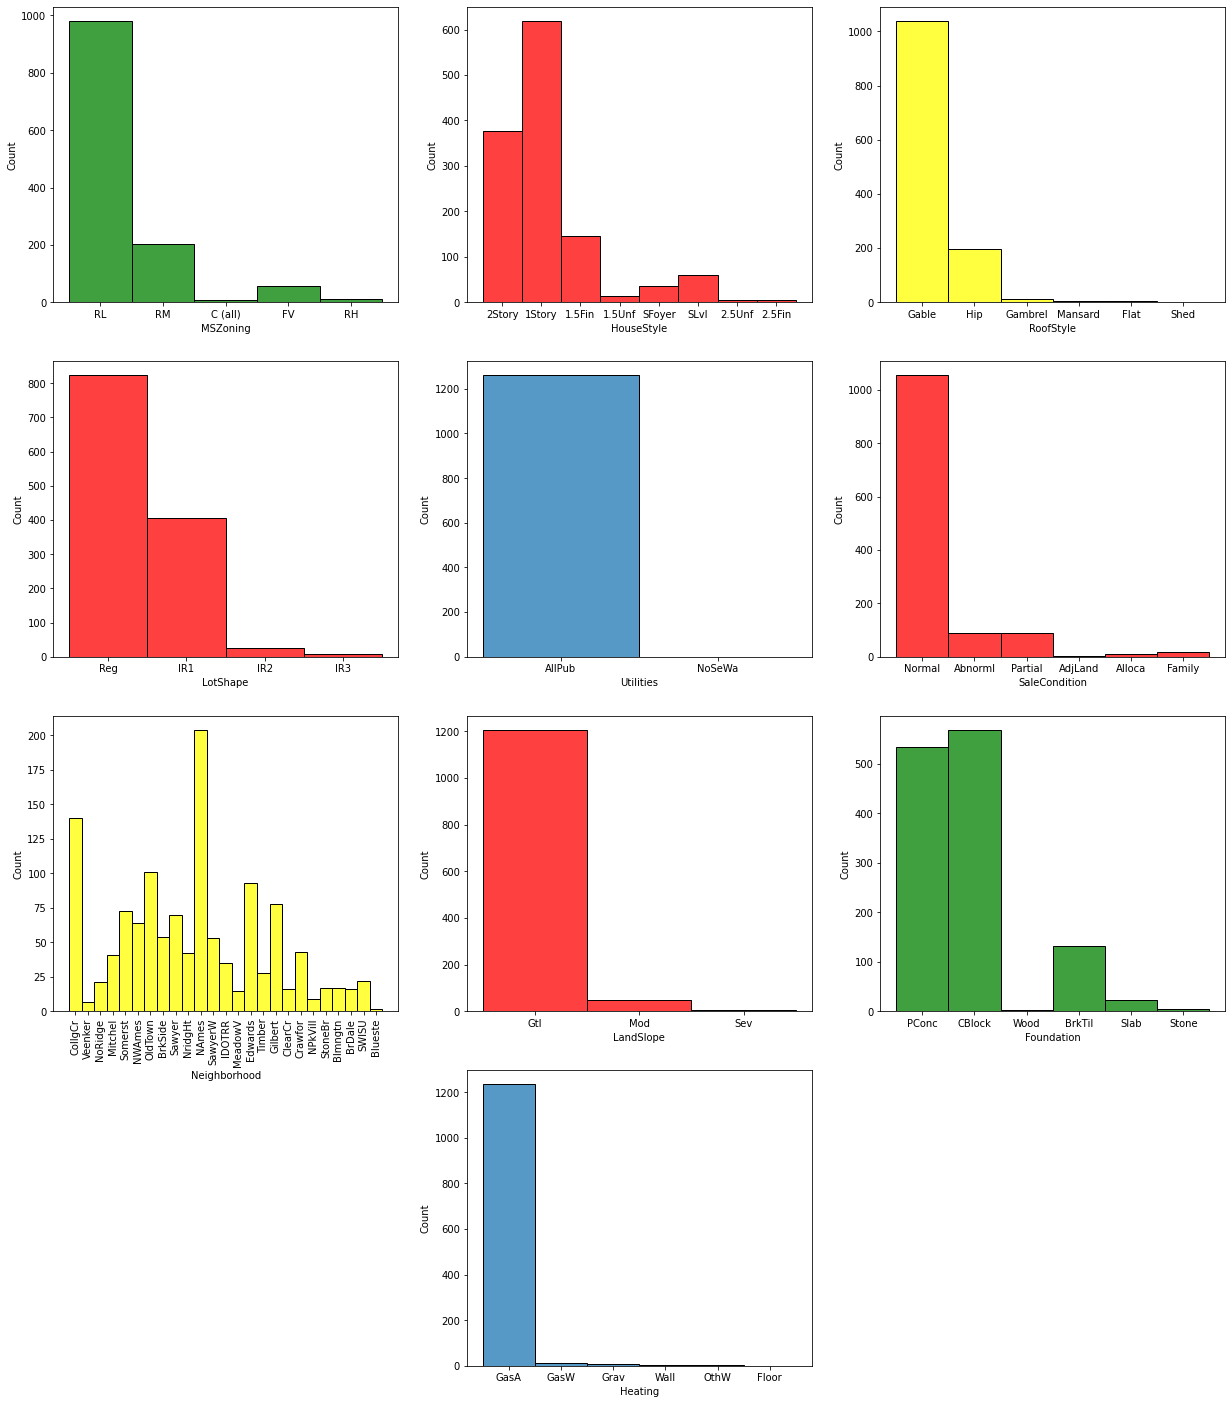

In [28]:
plt.figure(figsize=(21,25))
plt.subplot(4,3,1)
sns.histplot(df['MSZoning'],color = 'green')
plt.subplot(4,3,2)
sns.histplot(df['HouseStyle'],color = 'red')
plt.subplot(4,3,3)
sns.histplot(df['RoofStyle'],color = 'yellow')
plt.subplot(4,3,4)
sns.histplot(df['LotShape'],color = 'red')
plt.subplot(4,3,5)
sns.histplot(df['Utilities'])
plt.subplot(4,3,6)
sns.histplot(df['SaleCondition'],color = 'red')
plt.subplot(4,3,7)
sns.histplot(df['Neighborhood'],color = 'yellow')
plt.xticks(rotation=90)
plt.subplot(4,3,8)
sns.histplot(df['LandSlope'],color = 'red')
plt.subplot(4,3,9)
sns.histplot(df['Foundation'],color = 'green')
plt.subplot(4,3,11)
sns.histplot(df['Heating'])
plt.show()

BI VARIATE ANALYSIS

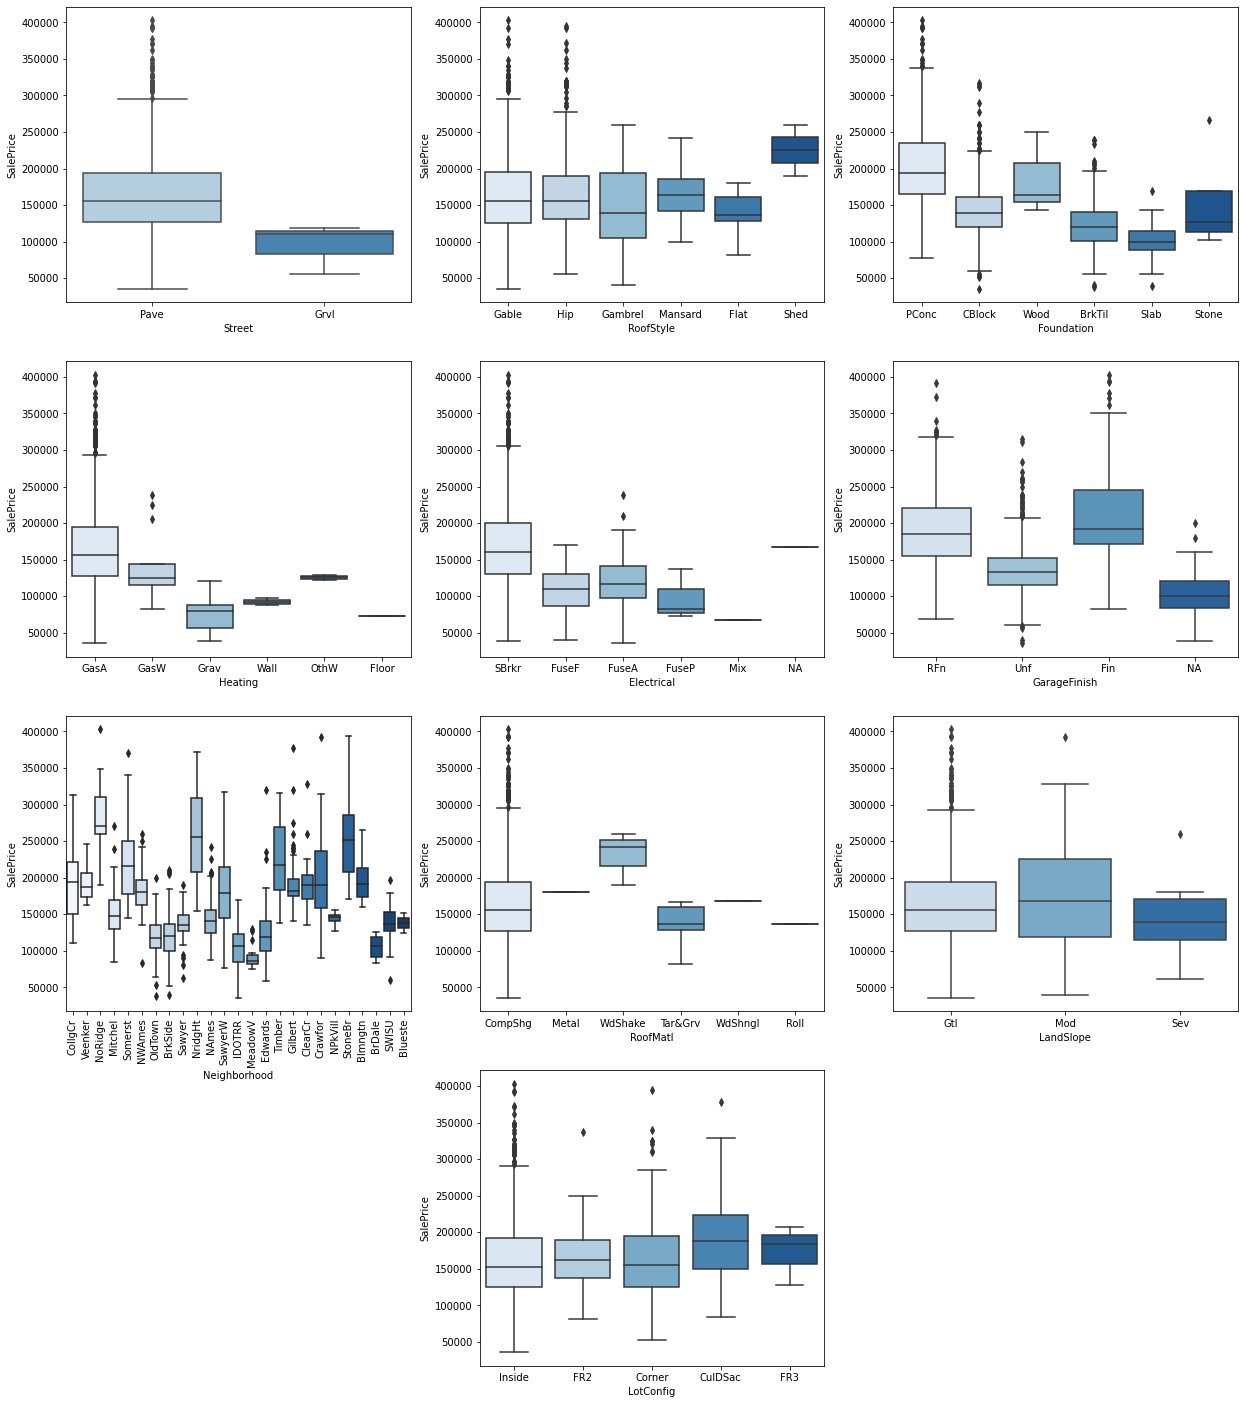

In [29]:
#observation
# here bi variate analysis is done between sale price and various other elements
plt.figure(figsize=(21,25))
plt.subplot(4,3,1)
sns.boxplot(data = df,y='SalePrice', x='Street',palette='Blues')
#Sale price of Paved street is way more higher than gravel
plt.subplot(4,3,2)
sns.boxplot(data = df,y='SalePrice', x='RoofStyle',palette='Blues')
# sale proce of shed is higher than all other roof styles
# and the least is occupied by flats
plt.subplot(4,3,3)
sns.boxplot(data = df,y='SalePrice', x='Foundation',palette='Blues')
#sale price of poured concrete is way higher  thall other types of foundations
plt.subplot(4,3,4)
sns.boxplot(data = df,y='SalePrice', x='Heating',palette='Blues')
#sale price of gas forced air furnace in heating is greater than all other heatings equipments
plt.subplot(4,3,5)
sns.boxplot(data = df,y='SalePrice', x='Electrical',palette='Blues')
# sale price of standard circuit breakers and romes are way high than all other electrical components involved
plt.subplot(4,3,6)
sns.boxplot(data = df,y='SalePrice', x='GarageFinish',palette='Blues')
# sale price of rough finished garages and finished garages are almost equal
plt.subplot(4,3,7)
sns.boxplot(data = df,y='SalePrice', x='Neighborhood',palette='Blues')
plt.xticks(rotation = 90)
plt.subplot(4,3,8)
sns.boxplot(data = df,y='SalePrice', x='RoofMatl',palette='Blues')
plt.subplot(4,3,9)
sns.boxplot(data = df,y='SalePrice', x='LandSlope',palette='Blues')
# sale price of moderate slope is slightly higher than rest others
plt.subplot(4,3,11)
sns.boxplot(data = df,y='SalePrice', x='LotConfig',palette='Blues')
plt.show()

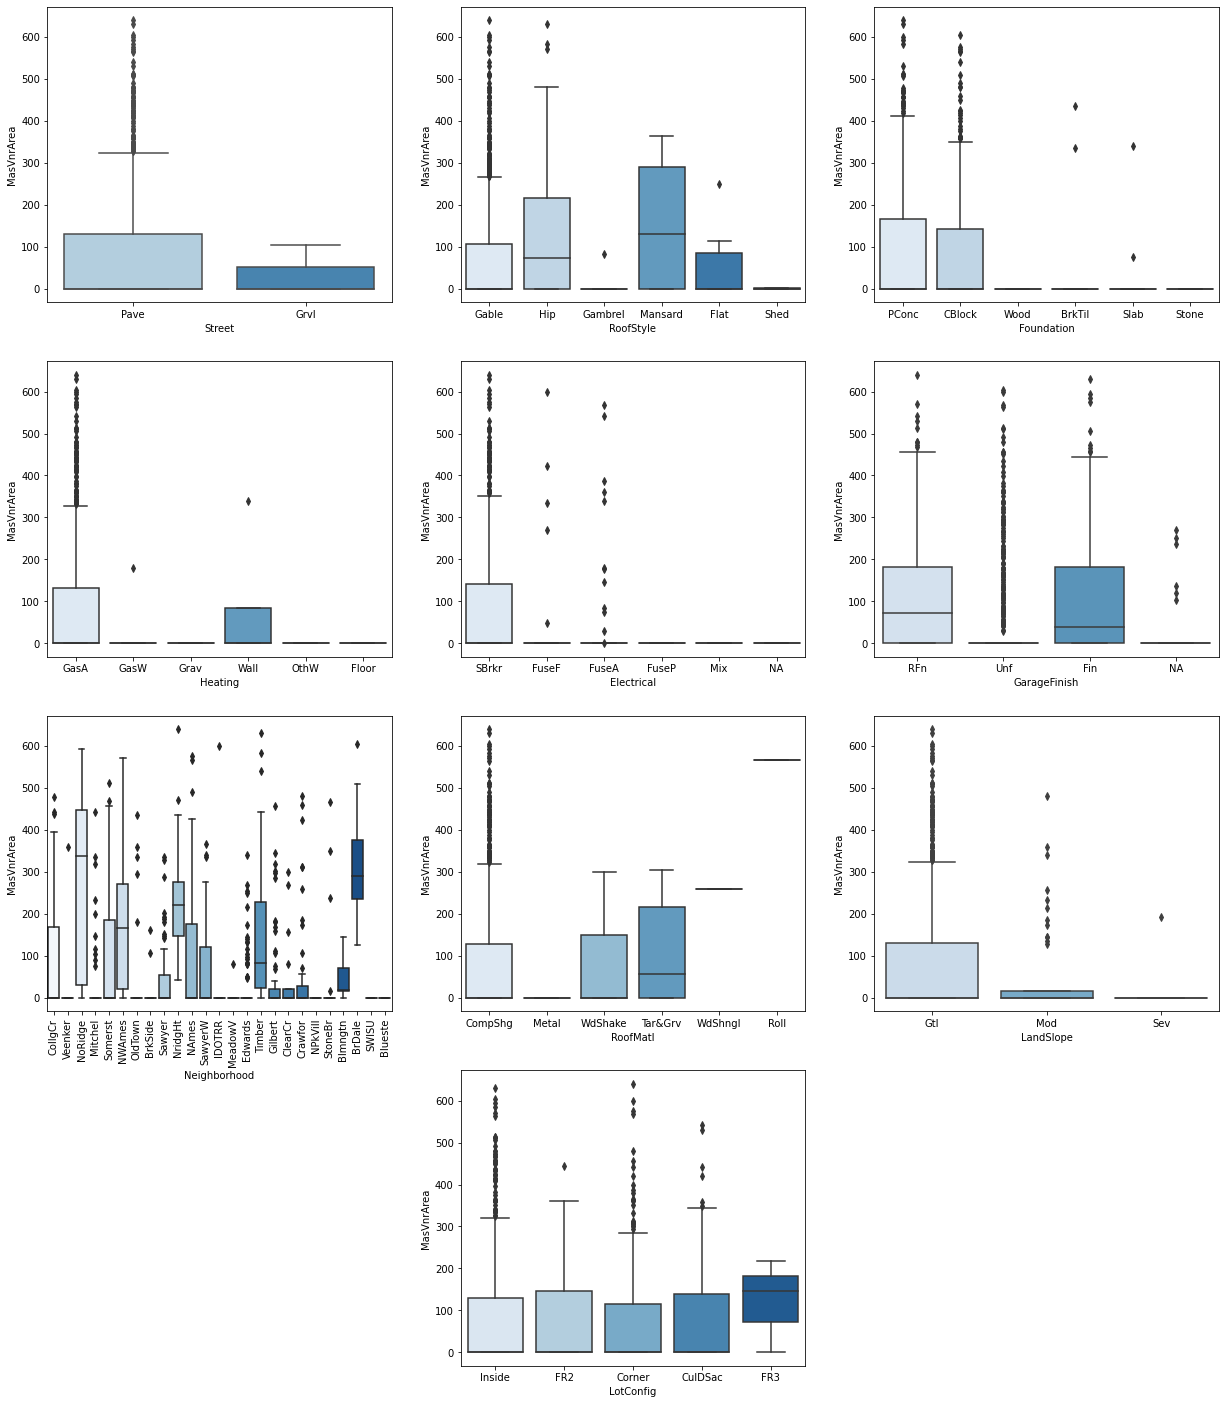

In [30]:
#observation
# here bi variate analysis is done between MasVnrArea and various other elements
# there is not much we can inferr from this
plt.figure(figsize=(21,25))
plt.subplot(4,3,1)
sns.boxplot(data = df,y='MasVnrArea', x='Street',palette='Blues')
plt.subplot(4,3,2)
sns.boxplot(data = df,y='MasVnrArea', x='RoofStyle',palette='Blues')
plt.subplot(4,3,3)
sns.boxplot(data = df,y='MasVnrArea', x='Foundation',palette='Blues')
plt.subplot(4,3,4)
sns.boxplot(data = df,y='MasVnrArea', x='Heating',palette='Blues')
plt.subplot(4,3,5)
sns.boxplot(data = df,y='MasVnrArea', x='Electrical',palette='Blues')
plt.subplot(4,3,6)
sns.boxplot(data = df,y='MasVnrArea', x='GarageFinish',palette='Blues')
plt.subplot(4,3,7)
sns.boxplot(data = df,y='MasVnrArea', x='Neighborhood',palette='Blues')
plt.xticks(rotation = 90)
plt.subplot(4,3,8)
sns.boxplot(data = df,y='MasVnrArea', x='RoofMatl',palette='Blues')
plt.subplot(4,3,9)
sns.boxplot(data = df,y='MasVnrArea', x='LandSlope',palette='Blues')
plt.subplot(4,3,11)
sns.boxplot(data = df,y='MasVnrArea', x='LotConfig',palette='Blues')
plt.show()

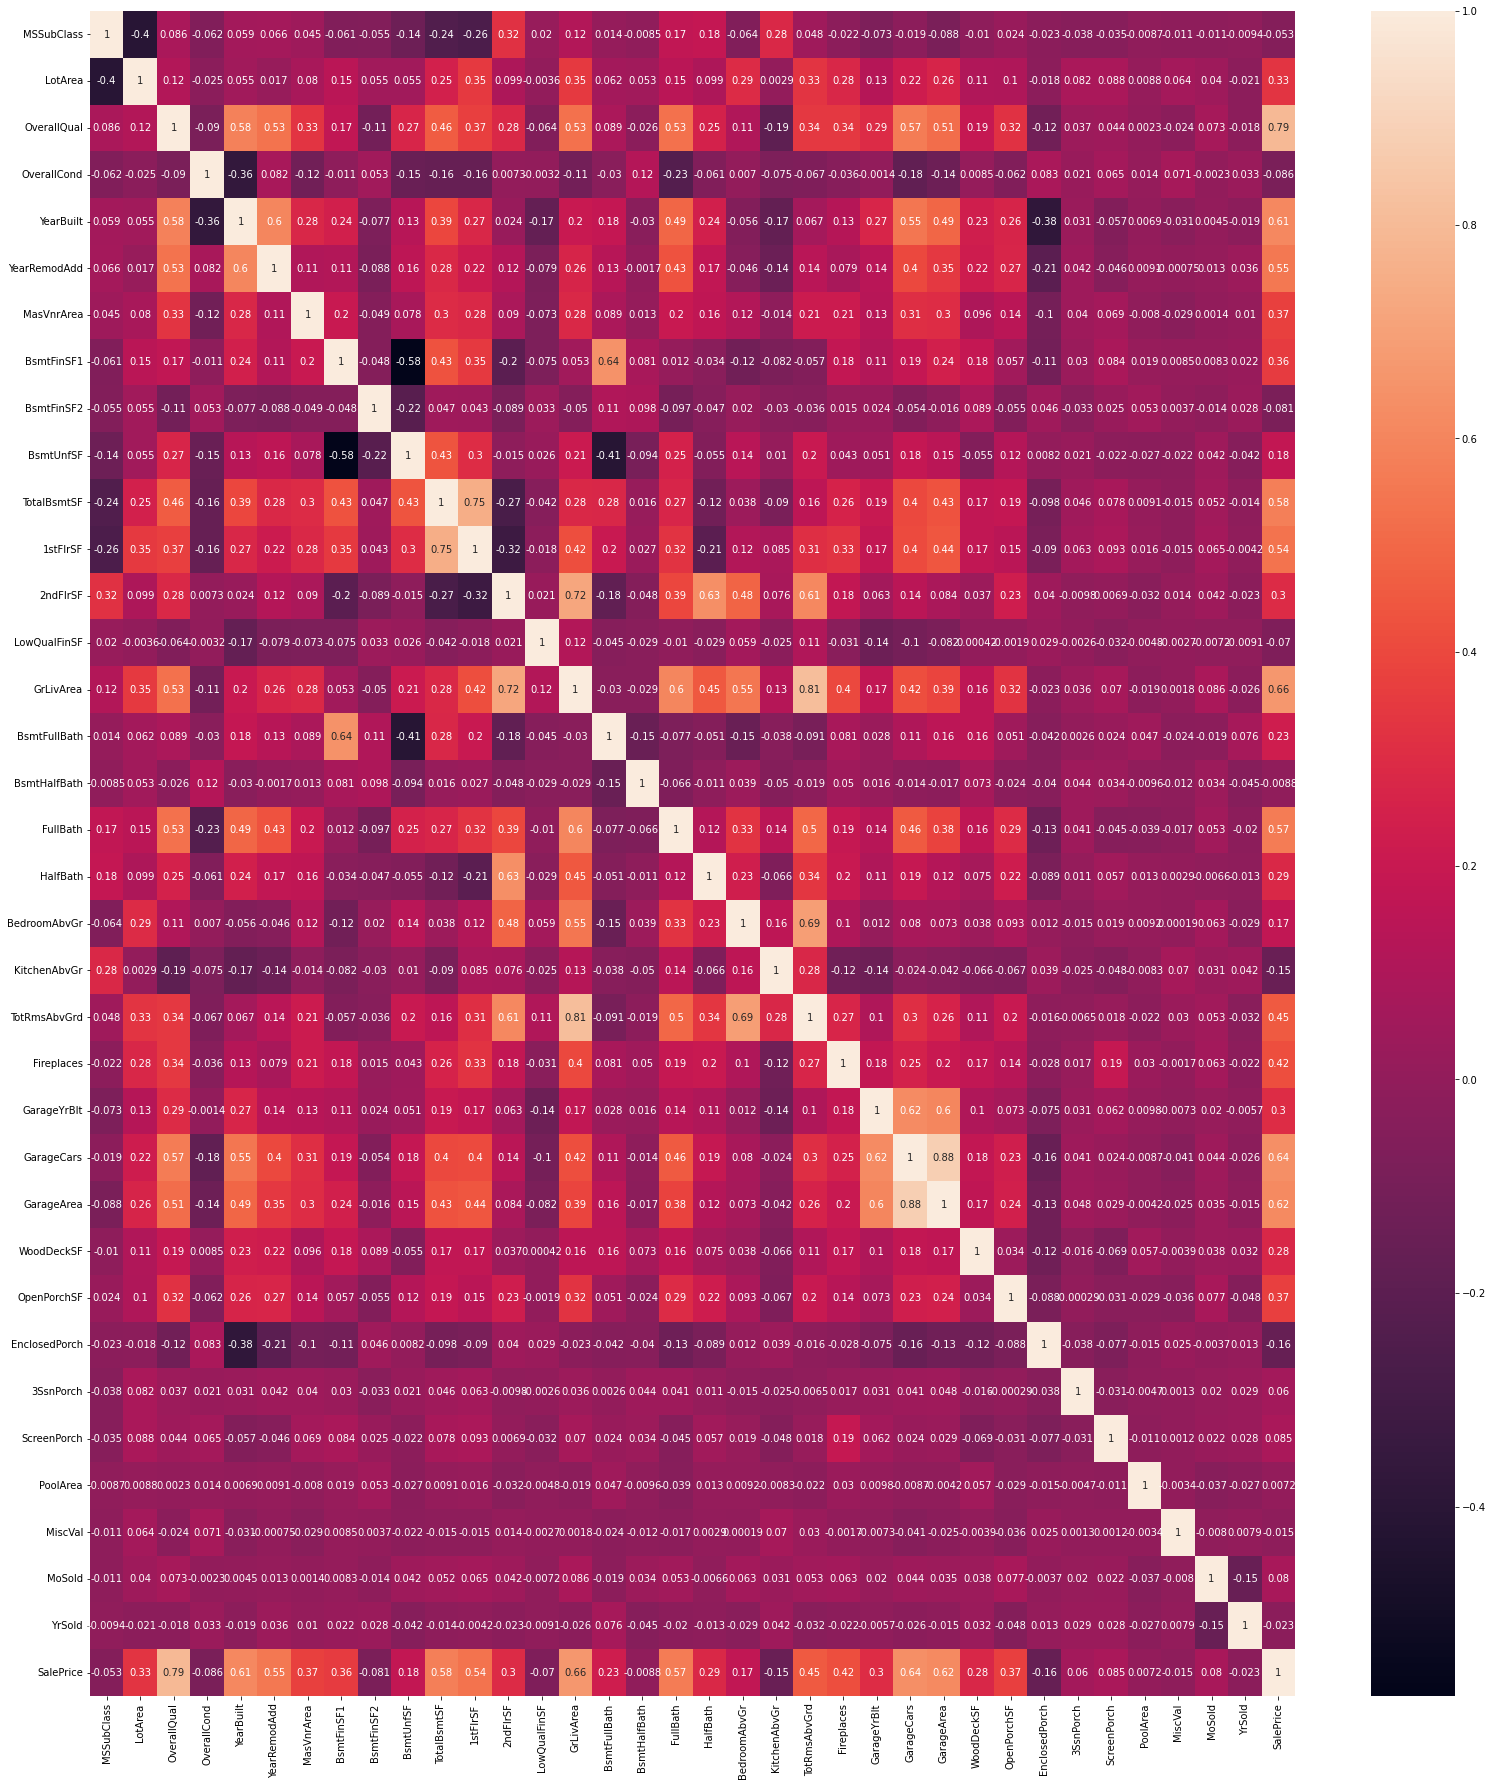

In [31]:
k = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(27,31))
sns.heatmap(k.corr(),annot=True)
plt.show()

CHECKING CORREALTION AMONG COLUMNS

In [64]:
cormatrix = df.corr()
c1 = cormatrix.abs().unstack()
k = c1.sort_values(kind="quicksort")
print(k[1254:1260])
# Here as you can see GarageCars,GarageArea and TotRmsAbvGrd,GrLivArea are correlated 
# hence we drop either one of them

Series([], dtype: float64)


In [33]:
df.drop(columns=['GarageCars','TotRmsAbvGrd','YearBuilt','GarageArea','GrLivArea','OverallQual'],axis=1,inplace=True)
# dropping columns

DATA PREPARATION

In [34]:
# checking for variables that are in yes or no format so that we can map them to 0 and 1
c=[]
for i in df:
    if len(df[i].value_counts())<=2:
        c.append(i)
print(c)

['Street', 'Utilities', 'CentralAir']


In [35]:
df['Street'] = df['Street'].apply(lambda x: 1 if x =='Pave' else 0)
df['Utilities'] = df['Utilities'].apply(lambda x: 1 if x =='AllPub' else 0)
df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x =='Y' else 0)

In [36]:
#lets check for categorical variables and convert them
category = df.select_dtypes(include=['object'])
category.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [37]:
#lets create the dummy variables for all the categorical columns above and drop the columns after creating
# we use drop_first because if we don't it gives us trouble at the end in VIF being infinity
category_dummies = pd.get_dummies(category,drop_first=True)
#category_dummies.head()


In [38]:
# Now dropping the main columns as we no longer require them and concatinating the dummies with the main df
df_model = df.drop(list(category.columns),axis=1)
df_model = pd.concat([df_model,category_dummies],axis=1)

In [39]:
df_model.shape

(1261, 232)

DIVIDING DATA IN TO TEST AND TRAIN

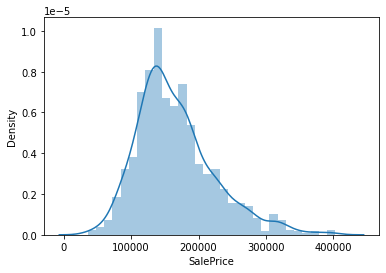

In [40]:
sns.distplot(df_model['SalePrice'])
plt.show()
# As you can see the data is skewed towards left side we will apply log in next step

In [41]:
np.random.seed(0)
y= np.log(df_model.SalePrice)
X = df_model.drop("SalePrice",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100) 


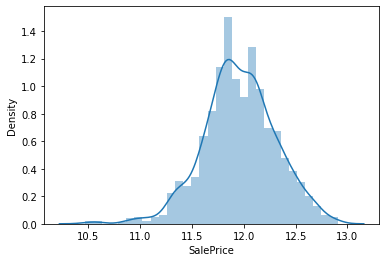

In [42]:
sns.distplot(y)
plt.show()
# now lets prepare the model

In [43]:
# standardising numerical values using min max scaler
numerical = X_train.select_dtypes(include=['int64','float64'])
numerical = numerical.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

RFE

In [44]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)
#using RFE to find most suitable columns
rfe_m = RFE(lm, n_features_to_select=30)
rfe_m = rfe_m.fit(X_train,y_train)
col = X_train.columns[rfe_m.support_]
# RFE_LIST = pd.DataFrame(list(zip(X_train.columns,rfe_m.support_,rfe_m.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
# print(RFE_LIST)

In [45]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

8.725368590472193
[-4.33693922e-02  1.45600243e-01 -1.75190972e-01  1.38918829e-01
  2.21410683e-01  7.47080195e-02  4.07200385e-03  4.47889128e+11
  2.33386232e+11  4.95687572e+11 -5.47616747e+11  9.34323892e-02
  3.84355300e-01  4.00155914e-01  1.67392210e-01  2.51009900e-02
  4.73392862e-03  8.69960952e-02  6.25323174e-02 -1.24401666e-02
 -1.78767096e-01  8.54990244e-02  2.05063830e+00  3.82324955e-02
  3.49981336e-02  4.30571673e-02 -4.82122936e-02  8.25488679e-02
  1.75639924e-01 -2.62145096e-01  1.73545950e-03 -8.24476268e-03
  3.01816275e-01  3.43069077e-01  3.31604004e-01  3.17565918e-01
  1.06525421e-02  1.48344040e-03  9.30786133e-03  1.43737793e-02
 -1.17683411e-02 -2.19421387e-02  1.62963867e-02 -6.30340576e-02
 -2.69317627e-02 -2.31800079e-02  6.19411469e-03 -2.41083145e-01
 -1.00922346e-01 -7.07283020e-02 -7.01227188e-02 -7.67726898e-02
 -4.66766357e-02  5.30853271e-02 -1.01425171e-01 -4.11987305e-02
 -1.55929565e-01 -1.89735413e-01 -1.01548672e-01 -6.53400421e-02
  9.510

In [46]:
#normal predictions using rfe
y_pred_train = rfe_m.predict(X_train)
y_pred_test = rfe_m.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2 value for train set is {r2_train_lr}')
print('_________________________')
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2 value for test set is {r2_test_lr}')
print('_________________________')
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'Sum of squares for train set is {rss1_lr}')
print('_________________________')
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'Sum of squares for test set is {rss2_lr}')
metric.append(rss2_lr)
print('_________________________')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'Mean sqaured error for train set is {mse_train_lr}')
print('_________________________')
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'Mean sqaured error for test set is {mse_test_lr}')
print('_________________________')
metric.append(mse_test_lr**0.5)

R2 value for train set is 0.8675127964906202
_________________________
R2 value for test set is 0.7799236213689604
_________________________
Sum of squares for train set is 13.903830528958313
_________________________
Sum of squares for test set is 10.734862756552346
_________________________
Mean sqaured error for train set is 0.015763980191562714
_________________________
Mean sqaured error for test set is 0.028324176138660544
_________________________


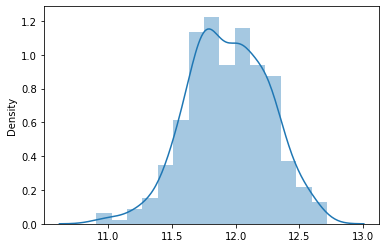

In [47]:
sns.distplot(y_pred_test)
plt.show()
# as you can see still the graph is not good lets go to ridge and lasso

RIDGE REGRESSION

In [48]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [50]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-6.27805145e-02  1.37181302e-01 -5.74828843e-02  3.00484504e-02
  1.77893301e-01  9.77964753e-02  1.70437583e-02  1.51854131e-01
  4.14408577e-02  7.73303327e-02  2.11858431e-01  9.31533773e-02
  3.21487343e-01  2.41924136e-01  3.94546892e-02  2.86584172e-02
 -3.59675313e-03  1.32553574e-01  7.60322480e-02  2.99464386e-02
 -7.21245411e-02  8.81389195e-02  4.04072918e-02  4.31484215e-02
  4.90764083e-02  2.76400822e-02 -1.49162446e-02  6.57836313e-02
  4.12637025e-02 -3.86063359e-02 -8.96471021e-03 -1.19802027e-02
  3.48963550e-02  5.83213548e-02  7.91587551e-02  4.14602601e-02
  2.09923865e-02 -1.38479826e-03  1.03260704e-02  1.19322815e-03
  9.82148578e-03 -3.03347679e-02  2.48410183e-02 -5.63736630e-02
 -3.72210648e-03 -1.92199746e-02 -1.06130855e-02 -5.79772059e-02
 -1.27435560e-02 -2.29924863e-02 -1.92589236e-02  9.37652843e-03
 -1.17745329e-02  8.67984476e-02 -4.56012274e-02 -1.52429859e-02
 -8.50150090e-02 -1.23814116e-01 -5.39620833e-02 -2.25401895e-02
  2.20591862e-02 -1.32553

In [51]:
ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=5]
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015548,0.006095,0.005165,0.002064,0.0001,{'alpha': 0.0001},-0.089862,-0.096706,-0.087596,-0.091306,-0.097854,-0.092665,0.003966,23,-0.061348,-0.057946,-0.058664,-0.057831,-0.058759,-0.058909,0.001274
1,0.012566,0.001353,0.005187,0.000979,0.001,{'alpha': 0.001},-0.089838,-0.096740,-0.087517,-0.091224,-0.097956,-0.092655,0.004029,22,-0.061348,-0.057946,-0.058661,-0.057835,-0.058784,-0.058915,0.001273
2,0.014165,0.002709,0.005384,0.002049,0.01,{'alpha': 0.01},-0.089551,-0.096865,-0.087166,-0.090656,-0.098417,-0.092531,0.004350,21,-0.061394,-0.058109,-0.058747,-0.057986,-0.059042,-0.059056,0.001233
3,0.011366,0.002406,0.003307,0.000410,0.05,{'alpha': 0.05},-0.088512,-0.095674,-0.087149,-0.089977,-0.098072,-0.091877,0.004245,20,-0.061616,-0.058716,-0.059276,-0.058371,-0.059627,-0.059521,0.001134
4,0.009573,0.001025,0.004189,0.000737,0.1,{'alpha': 0.1},-0.087203,-0.094022,-0.087072,-0.089522,-0.097215,-0.091007,0.003995,19,-0.061816,-0.059242,-0.059646,-0.058737,-0.060029,-0.059894,0.001052
5,0.009189,0.001169,0.003236,0.000803,0.2,{'alpha': 0.2},-0.085113,-0.091671,-0.086827,-0.088723,-0.095620,-0.089591,0.003718,18,-0.062152,-0.060019,-0.060191,-0.059222,-0.060610,-0.060439,0.000968
6,0.017342,0.002864,0.005596,0.002237,0.3,{'alpha': 0.3},-0.083593,-0.090151,-0.086603,-0.088226,-0.094276,-0.088570,0.003573,17,-0.062443,-0.060563,-0.060565,-0.059618,-0.061066,-0.060851,0.000924
7,0.008976,0.001784,0.002792,0.000746,0.4,{'alpha': 0.4},-0.082432,-0.088989,-0.086447,-0.087797,-0.093092,-0.087751,0.003466,16,-0.062695,-0.061023,-0.060861,-0.059963,-0.061439,-0.061196,0.000891
8,0.009178,0.000977,0.002989,0.001089,0.5,{'alpha': 0.5},-0.081570,-0.088089,-0.086338,-0.087419,-0.092049,-0.087093,0.003368,14,-0.062912,-0.061445,-0.061107,-0.060257,-0.061744,-0.061493,0.000867
9,0.008983,0.000900,0.003191,0.001164,0.6,{'alpha': 0.6},-0.080897,-0.087330,-0.086259,-0.087097,-0.091117,-0.086540,0.003281,13,-0.063133,-0.061813,-0.061326,-0.060520,-0.062005,-0.061759,0.000857


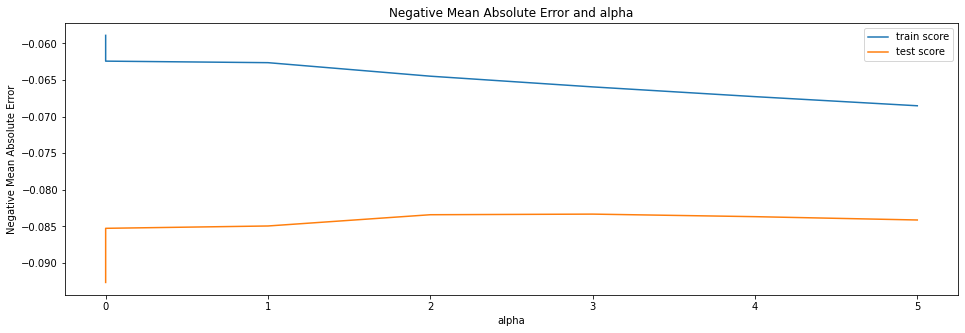

In [52]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [53]:
#Ridge regression predictions
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2 value for ridge train set is {r2_train_lr}')
print('_________________________')
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2 value for ridge test set is {r2_test_lr}')
print('_________________________')
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'Sum of squares for ridge train set is {rss1_lr}')
print('_________________________')
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'Sum of squares for ridge test set is {rss2_lr}')
metric_ridge.append(rss2_lr)
print('_________________________')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'Mean sqaured error for ridge train set is {mse_train_lr}')
print('_________________________')
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'Mean sqaured error for ridge test set is {mse_test_lr}')
print('_________________________')
metric_ridge.append(mse_test_lr**0.5)

R2 value for ridge train set is 0.9292886331189533
_________________________
R2 value for ridge test set is 0.8576650522825107
_________________________
Sum of squares for ridge train set is 7.420783559036044
_________________________
Sum of squares for ridge test set is 6.9427993077345205
_________________________
Mean sqaured error for ridge train set is 0.008413586801628167
_________________________
Mean sqaured error for ridge test set is 0.018318731682676836
_________________________


In [69]:
#printing the coefficients of ridge regression
params = list(ridge.coef_ )
params.insert(0, ridge.intercept_)
params = [round(x, 2) for x in params]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_mod = list(zip(cols, params))
ridge_model = pd.DataFrame(ridge_mod)
ridge_model.columns = ['Var', 'Coefficient']
ridge_model.sort_values(by=['Coefficient'],ascending=False).head(12)

,Var,Coefficient
0,constant,11.08
13,1stFlrSF,0.32
14,2ndFlrSF,0.24
11,TotalBsmtSF,0.21
5,OverallCond,0.18
8,BsmtFinSF1,0.15
2,LotArea,0.14
70,Neighborhood_StoneBr,0.14
18,FullBath,0.13
6,YearRemodAdd,0.10


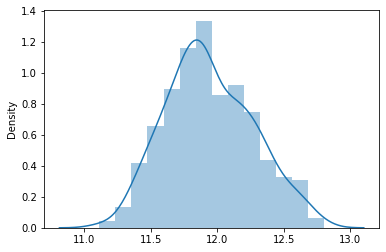

In [54]:
sns.distplot(y_pred_test)
plt.show()
# as you can see the graph is somewhat ok lets go to lasso

In [65]:
#  checking the condition what happens if we double the alpha value
alpha = 6
ridge_a = Ridge(alpha=alpha)

ridge_a.fit(X_train, y_train) 

#Ridge regression predictions for double aplha

y_pred_train = ridge_a.predict(X_train)
y_pred_test = ridge_a.predict(X_test)

metric_ridge = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2 value for ridge train set is {r2_train_lr}')
print('_________________________')
metric_ridge.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2 value for ridge test set is {r2_test_lr}')
print('_________________________')
metric_ridge.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'Sum of squares for ridge train set is {rss1_lr}')
print('_________________________')
metric_ridge.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'Sum of squares for ridge test set is {rss2_lr}')
metric_ridge.append(rss2_lr)
print('_________________________')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'Mean sqaured error for ridge train set is {mse_train_lr}')
print('_________________________')
metric_ridge.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'Mean sqaured error for ridge test set is {mse_test_lr}')
print('_________________________')
metric_ridge.append(mse_test_lr**0.5)


R2 value for ridge train set is 0.922346311472818
_________________________
R2 value for ridge test set is 0.8570500813584734
_________________________
Sum of squares for ridge train set is 8.14934345832134
_________________________
Sum of squares for ridge test set is 6.972796295643332
_________________________
Mean sqaured error for ridge train set is 0.009239618433470907
_________________________
Mean sqaured error for ridge test set is 0.0183978794080299
_________________________


In [70]:
#printing the coefficients of ridge regression
params = list(ridge_a.coef_ )
params.insert(0, ridge_a.intercept_)
params = [round(x, 2) for x in params]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_mod = list(zip(cols, params))
ridge_model = pd.DataFrame(ridge_mod)
ridge_model.columns = ['Var', 'Coefficient']
ridge_model.sort_values(by=['Coefficient'],ascending=False).head(12)

,Var,Coefficient
0,constant,11.13
13,1stFlrSF,0.29
14,2ndFlrSF,0.20
11,TotalBsmtSF,0.20
5,OverallCond,0.15
8,BsmtFinSF1,0.14
2,LotArea,0.13
18,FullBath,0.13
70,Neighborhood_StoneBr,0.11
6,YearRemodAdd,0.10


LASSO REGRESSION

In [55]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [57]:
#Fitting Ridge model for alpha =0.001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [59]:
cv_results_l = pd.DataFrame(model_cv.cv_results_)
cv_results_l = cv_results_l[cv_results_l['param_alpha']<=0.1]
cv_results_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048726,0.019140,0.002999,0.001093,0.0001,{'alpha': 0.0001},-0.081850,-0.088502,-0.085679,-0.084361,-0.088303,-0.085739,0.002499,1,-0.063891,-0.062712,-0.062568,-0.061601,-0.063300,-0.062814,0.000767
1,0.015019,0.005450,0.002393,0.001353,0.001,{'alpha': 0.001},-0.081631,-0.088767,-0.089945,-0.090309,-0.079339,-0.085998,0.004588,2,-0.077544,-0.075680,-0.075004,-0.075624,-0.077502,-0.076271,0.001050
2,0.011370,0.003530,0.003087,0.000643,0.01,{'alpha': 0.01},-0.117165,-0.106245,-0.129377,-0.134151,-0.118689,-0.121125,0.009806,3,-0.116254,-0.116978,-0.116631,-0.111862,-0.119911,-0.116327,0.002581
3,0.010575,0.005170,0.002378,0.001342,0.05,{'alpha': 0.05},-0.199633,-0.195163,-0.230135,-0.210920,-0.213174,-0.209805,0.012196,4,-0.209299,-0.211814,-0.208839,-0.207305,-0.205061,-0.208463,0.002235
4,0.009575,0.002412,0.003982,0.001550,0.1,{'alpha': 0.1},-0.263431,-0.261994,-0.291019,-0.268489,-0.266141,-0.270215,0.010639,5,-0.271930,-0.272153,-0.264836,-0.270621,-0.271031,-0.270114,0.002699


In [60]:
#printing the coefficients of lasso regression
lasso.coef_

array([-4.99990307e-02,  1.46979458e-01, -1.18409323e-01,  9.02265677e-03,
        2.12734316e-01,  8.89871159e-02,  3.43910363e-03,  9.32910206e-02,
        1.89243051e-02, -0.00000000e+00,  3.07141287e-01,  9.04041041e-02,
        3.93008487e-01,  3.47142134e-01,  7.16995710e-02,  2.41291841e-02,
       -1.58165702e-03,  1.15701336e-01,  6.82615516e-02, -1.30647156e-02,
       -1.81335673e-01,  7.98310541e-02,  1.35572242e-01,  4.11156741e-02,
        3.94477014e-02,  2.96696404e-02, -0.00000000e+00,  6.80377764e-02,
        8.41467231e-02, -1.14399790e-01, -5.53314330e-03, -6.90284271e-03,
        1.21735208e-01,  1.62290862e-01,  1.70774087e-01,  1.46493803e-01,
        1.35284419e-02, -0.00000000e+00,  1.06507490e-02,  4.45976041e-03,
        4.72899777e-03, -2.39102867e-02,  1.89309933e-02, -5.50749760e-02,
       -0.00000000e+00, -1.99572916e-02, -4.87358840e-03, -6.93176754e-02,
       -0.00000000e+00, -1.54025800e-02, -2.23576797e-02,  0.00000000e+00,
       -0.00000000e+00,  

In [61]:
#Lasso regression predictions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2 value for lasso train set is {r2_train_lr}')
print('_________________________')
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2 value for lasso test set is {r2_test_lr}')
print('_________________________')
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'Sum of squares for lasso train set is {rss1_lr}')
print('_________________________')
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'Sum of squares for lasso test set is {rss2_lr}')
metric_lasso.append(rss2_lr)
print('_________________________')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'Mean sqaured error for lasso train set is {mse_train_lr}')
print('_________________________')
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'Mean sqaured error for lasso test set is {mse_test_lr}')
print('_________________________')
metric_lasso.append(mse_test_lr**0.5)

R2 value for lasso train set is 0.934527206788694
_________________________
R2 value for lasso test set is 0.8545178485740221
_________________________
Sum of squares for lasso train set is 6.8710229890472405
_________________________
Sum of squares for lasso test set is 7.096313283599129
_________________________
Mean sqaured error for lasso train set is 0.007790275497785987
_________________________
Mean sqaured error for lasso test set is 0.018723781750921185
_________________________


In [67]:
#printing the coefficients of lasso regression
params = list(lasso.coef_ )
params.insert(0, lasso.intercept_)
params = [round(x, 2) for x in params]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_mod = list(zip(cols, params))
lasso_model = pd.DataFrame(lasso_mod)
lasso_model.columns = ['Var', 'Coefficient']
lasso_model.sort_values(by=['Coefficient'],ascending=False).head(10)

,Var,Coefficient
0,constant,11.00
13,1stFlrSF,0.39
14,2ndFlrSF,0.35
11,TotalBsmtSF,0.31
5,OverallCond,0.21
35,MSZoning_RL,0.17
70,Neighborhood_StoneBr,0.16
34,MSZoning_RH,0.16
2,LotArea,0.15
36,MSZoning_RM,0.15


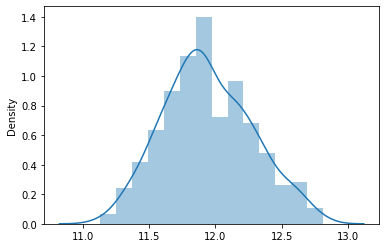

In [62]:
sns.distplot(y_pred_test)
plt.show()
# as you can see still the graph is not good lets go to ridge and lasso

In [66]:

#doubling the alpha value and checking for any changes
alpha =0.0002

lasso_a = Lasso(alpha=alpha)
        
lasso_a.fit(X_train, y_train) 
#Lasso regression predictions
y_pred_train = lasso_a.predict(X_train)
y_pred_test = lasso_a.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2 value for lasso train set is {r2_train_lr}')
print('_________________________')
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2 value for lasso test set is {r2_test_lr}')
print('_________________________')
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'Sum of squares for lasso train set is {rss1_lr}')
print('_________________________')
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'Sum of squares for lasso test set is {rss2_lr}')
metric_lasso.append(rss2_lr)
print('_________________________')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'Mean sqaured error for lasso train set is {mse_train_lr}')
print('_________________________')
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'Mean sqaured error for lasso test set is {mse_test_lr}')
print('_________________________')
metric_lasso.append(mse_test_lr**0.5)


R2 value for lasso train set is 0.9290820847961535
_________________________
R2 value for lasso test set is 0.8529974881333061
_________________________
Sum of squares for lasso train set is 7.442459711903487
_________________________
Sum of squares for lasso test set is 7.17047326738794
_________________________
Mean sqaured error for lasso train set is 0.008438162938666085
_________________________
Mean sqaured error for lasso test set is 0.018919454531366595
_________________________


In [68]:
#printing the coefficients of lasso regression
params = list(lasso_a.coef_ )
params.insert(0, lasso_a.intercept_)
params = [round(x, 2) for x in params]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_mod = list(zip(cols, params))
lasso_model = pd.DataFrame(lasso_mod)
lasso_model.columns = ['Var', 'Coefficient']
lasso_model.sort_values(by=['Coefficient'],ascending=False).head(10)

,Var,Coefficient
0,constant,11.08
13,1stFlrSF,0.40
14,2ndFlrSF,0.33
11,TotalBsmtSF,0.30
5,OverallCond,0.21
70,Neighborhood_StoneBr,0.15
2,LotArea,0.14
23,GarageYrBlt,0.13
18,FullBath,0.12
69,Neighborhood_Somerst,0.11


In [63]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.867513,0.929289,0.934527
1,R2 Score (Test),0.779924,0.857665,0.854518
2,RSS (Train),13.903831,7.420784,6.871023
3,RSS (Test),10.734863,6.942799,7.096313
4,MSE (Train),0.125555,0.091726,0.088263
5,MSE (Test),0.168298,0.135347,0.136835
